In [1]:
#Import des librairies
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder, MinMaxScaler, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.metrics import *


In [2]:
# Importation des données et visualisation 
df = pd.read_csv('house_cleaned.csv') 
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_recent,basement_boolean,renovation_period,view_on_the_sea
0,164,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,98178,47.5112,-122.257,1340,5650,0,0,1,0
1,221,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,1,1,3,0
2,299,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,98028,47.7379,-122.233,2720,8062,0,0,2,0
3,221,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,98136,47.5208,-122.393,1360,5000,0,1,1,0
4,292,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,98074,47.6168,-122.045,1800,7503,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,19,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,2009,98103,47.6993,-122.346,1530,1509,1,0,3,0
21596,297,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2014,98146,47.5107,-122.362,1830,7200,1,0,3,0
21597,52,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,2009,98144,47.5944,-122.299,1020,2007,1,0,3,0
21598,259,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,2004,98027,47.5345,-122.069,1410,1287,1,0,3,0


In [3]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated_recent', 'basement_boolean',
       'renovation_period', 'view_on_the_sea'],
      dtype='object')

In [4]:
# Séparation des features et des targets

y = df['price']
X = df.drop(['price','date','long'], axis=1)

In [5]:
print(y.shape)
print(X.shape)


(21600,)
(21600, 21)


In [6]:
# Création du test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Création d'un régresseur naïf pour comparer la performance
dr = DummyRegressor(strategy='median')
dr.fit(X_train, y_train)
y_pred = dr.predict(X_test)
dr.score(X_test, y_test)

-0.07099438767825417

In [8]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_recent,basement_boolean,renovation_period,view_on_the_sea
count,21600.000000,2.160000e+04,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000,...,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.00000,21600.000000,21600.000000
mean,180.189167,5.401311e+05,3.371250,2.115532,2080.038194,1.511016e+04,1.494028,0.007546,0.234259,3.409537,...,1973.383148,98077.947083,47.560064,-122.213963,1986.600880,12770.001019,0.337083,0.39287,2.039815,0.249352
std,113.051766,3.671422e+05,0.905047,0.769290,918.312519,4.143221e+04,0.539677,0.086543,0.766342,0.650700,...,28.807277,53.512419,0.138558,0.140758,685.197228,27311.356847,0.472725,0.48840,0.929771,0.850809
min,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.00000,1.000000,0.000000
25%,81.000000,3.220000e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1954.000000,98033.000000,47.471075,-122.328000,1490.000000,5100.000000,0.000000,0.00000,1.000000,0.000000
50%,167.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000,0.00000,2.000000,0.000000
75%,291.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,...,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000,1.000000,1.00000,3.000000,0.000000
max,390.000000,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.00000,3.000000,6.000000


In [9]:
# Problème avec OrdinalEncoder sur les features numériques
# Certaines features non compatibles ?

df.dtypes

date                   int64
price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
waterfront             int64
view                   int64
condition              int64
grade                  int64
sqft_above             int64
sqft_basement          int64
yr_built               int64
yr_renovated           int64
zipcode                int64
lat                  float64
long                 float64
sqft_living15          int64
sqft_lot15             int64
renovated_recent       int64
basement_boolean       int64
renovation_period      int64
view_on_the_sea        int64
dtype: object

## Sans GridSearchCV

In [37]:
#Choix des features :
#Certaines features trop corrélées mais le modèle semble mieux fonctionner avec...

numerical_features = ['sqft_living','bedrooms','bathrooms', 'floors','grade', 'sqft_above','view_on_the_sea','view','sqft_basement', 'sqft_living15','sqft_lot', 'condition', 'lat']
categorical_features = ['yr_built','yr_renovated','zipcode','renovated_recent', 'waterfront']



numerical_pipeline = make_pipeline(SimpleImputer(), MinMaxScaler(), PolynomialFeatures())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(), StandardScaler(with_mean=False))


preprocessor = make_column_transformer((numerical_pipeline, numerical_features), (categorical_pipeline, categorical_features))

preprocessor.fit_transform(X)

<21600x411 sparse matrix of type '<class 'numpy.float64'>'
	with 1566005 stored elements in Compressed Sparse Row format>

In [31]:
# Régression linéaire avec pipeline
lr1 = make_pipeline(preprocessor,LinearRegression())
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)

In [42]:
# Evaluation du training set

y_train_predict = lr1.predict(X_train)
r2 = r2_score(y_train, y_train_predict)

print("La performance du modèle sur la base d'apprentissage")
print('le score R2 est {}'.format(r2))
print('\n')

# Evualation du test set

y_test_predict = lr1.predict(X_test)
r2 = r2_score(y_test, y_test_predict)

print('La performance du modèle sur la base du test')
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base d'apprentissage
le score R2 est 0.882220422847736


La performance du modèle sur la base du test
le score R2 est 0.8508528970386268


## Ridge & Lasso

In [39]:
from sklearn.linear_model import Ridge
lr2 = make_pipeline(preprocessor,Ridge())
lr2.fit(X_train, y_train)
r2_score(y_test, lr2.predict(X_test))

0.8564203685796767

In [40]:
from sklearn.linear_model import Lasso
lr3 = make_pipeline(preprocessor,Lasso(normalize=True, tol=1e-2))
lr3.fit(X_train, y_train)
r2_score(y_test, lr3.predict(X_test))

0.8560878206681272

## Avec GridSearchCV

In [15]:
from sklearn.pipeline import Pipeline

# Liste des transformations
num_transformer = Pipeline([('imputer',SimpleImputer()), ('minmax', MinMaxScaler()), ('poly', PolynomialFeatures())])
cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder()), ('standard', StandardScaler(with_mean=False))])


# Liste des catégories à transformer
num_features = ['sqft_living','bedrooms','bathrooms', 'floors','grade', 'sqft_above', 'view_on_the_sea', 'view','sqft_basement', 'sqft_living15','sqft_lot', 'condition', 'lat']
cat_features = ['yr_built','yr_renovated','zipcode', 'waterfront', 'renovated_recent']


from sklearn.compose import ColumnTransformer

preprocessor2 = ColumnTransformer([('num', num_transformer, num_features), ('cat', cat_transformer, cat_features)])

pipe_lr = Pipeline([('preprocess',preprocessor2),('lr', LinearRegression())])
pipe_ridge = Pipeline([('preprocess',preprocessor2),('ridge', Ridge())])
pipe_lasso = Pipeline([('preprocess',preprocessor2),('lasso', Lasso(normalize=True, tol=1e-2))])

In [16]:
#Connaître les paramètres calculables dans GridSearchCV
pipe_ridge.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'ridge', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__num', 'preprocess__cat', 'preprocess__num__memory', 'preprocess__num__steps', 'preprocess__num__verbose', 'preprocess__num__imputer', 'preprocess__num__minmax', 'preprocess__num__poly', 'preprocess__num__imputer__add_indicator', 'preprocess__num__imputer__copy', 'preprocess__num__imputer__fill_value', 'preprocess__num__imputer__missing_values', 'preprocess__num__imputer__strategy', 'preprocess__num__imputer__verbose', 'preprocess__num__minmax__clip', 'preprocess__num__minmax__copy', 'preprocess__num__minmax__feature_range', 'preprocess__num__poly__degree', 'preprocess__num__poly__include_bias', 'preprocess__num__poly__interaction_only', 'preprocess__num__poly__order', 'preprocess__cat__memory', 'preprocess__cat__steps', 'preprocess__cat__verbose', 

In [29]:


from sklearn.model_selection import GridSearchCV

# Paramètres

param_lr = {'lr__fit_intercept':[True,False], 'lr__normalize':[True,False], 'lr__copy_X':[True, False]}
param_ridge = {'ridge__alpha': [0.02, 0.03, 0.04]}
param_lasso = {'lasso__alpha': [2.3, 2.31, 2.32]}

#Initialisation

grid_lr = GridSearchCV(pipe_lr, param_lr, cv=2)
grid_ridge = GridSearchCV(pipe_ridge, param_ridge, cv=2)
grid_lasso = GridSearchCV(pipe_lasso, param_lasso, cv=2)

#Entraînement
grid_result_lr = grid_lr.fit(X_train, y_train)
grid_result_ridge = grid_ridge.fit(X_train, y_train)
grid_result_lasso = grid_lasso.fit(X_train, y_train)


print('Meilleur score pour LR: ', grid_result_lr.best_score_)
print('avec paramètres suivants: ', grid_result_lr.best_params_)
print('--------------------------------------')

print('Meilleur score pour Ridge: ', grid_result_ridge.best_score_)
print('avec paramètres suivants: ', grid_result_ridge.best_params_)
print('--------------------------------------')

print('Meilleur score pour Lasso: ', grid_result_lasso.best_score_)
print('avec paramètres suivants: ', grid_result_lasso.best_params_)




Meilleur score pour LR:  0.8588073659220143
avec paramètres suivants:  {'lr__copy_X': True, 'lr__fit_intercept': False, 'lr__normalize': True}
--------------------------------------
Meilleur score pour Ridge:  0.8583442970435003
avec paramètres suivants:  {'ridge__alpha': 0.04}
--------------------------------------
Meilleur score pour Lasso:  0.8630097947196668
avec paramètres suivants:  {'lasso__alpha': 2.31}


## Courbe d'apprentissage

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(lr1, X, y, cv=None, scoring='r2', n_jobs=-1, train_sizes=range(3500,16000,20))

KeyboardInterrupt: 

In [ ]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

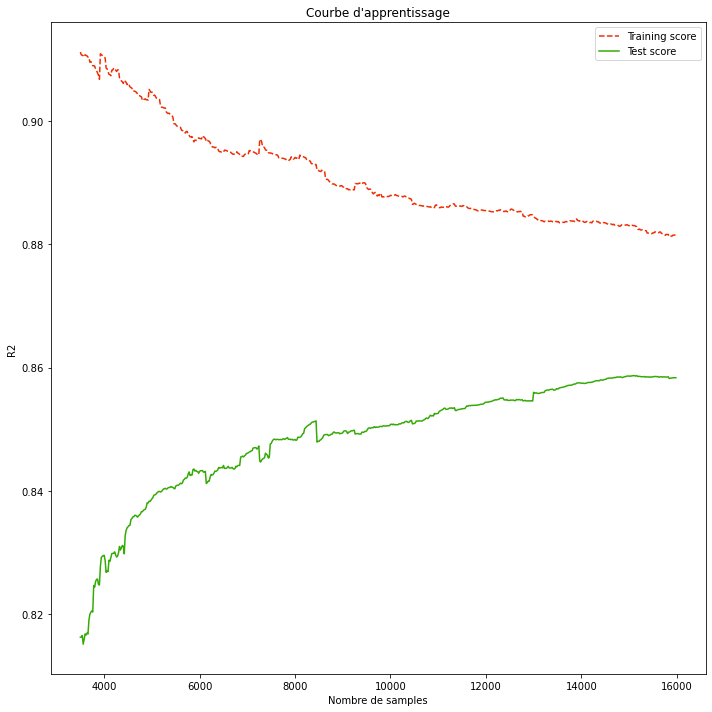

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#EF2D04",  label="Training score")
plt.plot(train_sizes, test_mean, color="#34AA06", label="Test score")

# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Courbe d'apprentissage")
plt.xlabel("Nombre de samples"), plt.ylabel("R2"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Améliorations possibles :
- Mieux comprendre le choix des features : leurs corrélations / leurs poids sur la prédiction
- Mieux comprendre les paramètres pour choisir dans le GridSearch
- Essayer "FunctionTransformer" pour log
- Essayer "RobustScaler"
- Essayer PolynomialFeatures à différents degrés suivant les features
- StatsModels
- SHAP